# Analsisa Online Store

Anda adalah seorang analis di sebuah toko daring besar. Anda bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan.

<b>Objektif:</b>
   1. Memprioritaskan hipotesis, menjalankan *A/B testing*, dan menganalisis hasilnya.

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
    - [Dataset hypotheses_us](#pertama)
    - [Dataset orders_us](#kedua)
    - [Dataset visits_us](#ketiga)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
    - [Dataset df_hyp](#pertama1)
    - [Dataset df_orders](#kedua2)
3. [*Exploratory Data Analysis*](#EDA)
    - [Memprioritaskan hipotesis](#1)
    - [Analisis A/B testing](#2)
        - [Mempersiapkan dataset](#2.1)
        - [Proses analisa stabilitas metrik kumulatif](#2.2)
        - [Menganalisa dan memperbaiki outlier](#2.3)
4. [Menguji Hipotesis](#Test)
    - [Signifikansi statistik perbedaan konversi antar kelompok (data mentah)](#h1)
    - [Signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok (data mentah)](#h2)
    - [Signifikansi statistik perbedaan konversi antar kelompok (data yang difilter)](#h3)
    - [Signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok (data yang difilter)](#h4)
5. [Kesimpulan Umum](#Kesimpulan)

## Ikhtisar Data <a id="Mulai"></a>

In [1]:
# Memuat semua library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Dataset hypotheses_us <a id="pertama"></a>

In [2]:
# Dataset
df_hyp = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\8 Project\\hypotheses_us.csv', sep=';')

In [3]:
# Informasi umum
df_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Ukuran dataset
df_hyp.shape

(9, 5)

In [5]:
# Sampel data
df_hyp.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Dokumentasi:
- `Hypotheses` - deskripsi singkat tentang hipotesis
- `Reach` - jangkauan pengguna, dalam skala satu hingga sepuluh
- `Impact` - dampak terhadap pengguna, dalam skala satu hingga sepuluh
- `Confidence` - keyakinan pada hipotesis, dalam skala satu sampai sepuluh
- `Effort` - sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai `Effort`, semakin intensif sumber daya pengujiannya.

In [6]:
# Memeriksa duplikat
df_hyp.duplicated().sum()

0

Penamaan kolom dalam dataset ini perlu dirubah ke *lower case*.

[Kembali ke tahapan](#back)

### Dataset orders_us <a id="kedua"></a>

In [7]:
# Dataset
df_orders = pd.read_csv(
    'Y:\\Online Course\\Practicum\\Jupyter Notebook\\8 Project\\orders_us.csv',
    parse_dates=['date']
)

In [8]:
# Informasi umum
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
# Ukuran dataset
df_orders.shape

(1197, 5)

In [10]:
# Sampel data
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Dokumentasi:
- `transactionId` - ID pesanan
- `visitorId` - ID pengguna yang membuat pesanan
- `date` - tanggal dibuatnya pesanan
- `revenue` - pendapatan dari pesanan
- `group` - kelompok uji (*test group*) A/B tempat pengguna berada

In [11]:
# Memeriksa duplikat
df_orders.duplicated().sum()

0

Penamaan kolom dalam dataset ini juga perlu dirubah ke lower case.

[Kembali ke tahapan](#back)

### Dataset visits_us <a id="ketiga"></a>

In [12]:
# Dataset
df_visits = pd.read_csv(
    'Y:\\Online Course\\Practicum\\Jupyter Notebook\\8 Project\\visits_us.csv',
    parse_dates=['date']
)

In [13]:
# Informasi umum
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# Ukuran dataset
df_visits.shape

(62, 3)

In [15]:
# Sampel data
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Dokumentasi:
- `date` - tanggal kunjungan
- `group` - kelompok uji (*test group*) A/B
- `visits` - jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

In [16]:
# Memeriksa duplikat
df_visits.duplicated().sum()

0

Dataset ini tampak bagus dan tidak memerlukan perbaikan.

**Kesimpulan sementara**

1. df_hyp dan df_orders, penamaan kolom yang menggunakan *camel case* dalam dataset perlu dirubah menjadi *snake case*. 
2. df_visits tidak memerlukan perbaikan.

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data <a id="Pra-pemrosesan"></a>

### Dataset df_hyp <a id="pertama1"></a>

In [17]:
# Memeriksa kolom dataset
df_hyp.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [18]:
# Memperbaiki nama kolom
df_hyp.columns = df_hyp.columns.str.lower()

In [19]:
# Memeriksa hasilnya
df_hyp.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Dataset berhasil diperbaiki.

### Dataset df_orders <a id="kedua2"></a>

In [20]:
# Memeriksa kolom dataset
df_orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [21]:
# Memperbaiki nama kolom
df_orders.columns = df_orders.columns.str.lower()

In [22]:
# Memeriksa hasilnya
df_orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

Dataset berhasil diperbaiki.

**Kesimpulan sementara**

Datase yang df_hyp dan df_orders sudah diperbaiki dari penggunaan nama kolom *camel case* menjadi *snake case*.

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Memprioritaskan hipotesis <a id="1"></a>

File hypotheses_us.csv memuat sembilan hipotesis untuk meningkatkan pendapatan toko daring dengan Reach, Impact, Confidence, dan Effort yang sudah ditentukan untuk masing-masing hipotesis.

ICE: salah satu metode paling populer yang digunakan untuk memprioritaskan masalah, terdiri dari *Impact, Confidence, Effort*.

In [23]:
# Menghitung ICE
df_hyp['ice'] =(
    (df_hyp['impact']*df_hyp['confidence'])
    /df_hyp['effort']
).round(1)

In [24]:
# Mengurutkan data
ice = df_hyp[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

# Menampilkan hasilnya
ice

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.2
0,Add two new channels for attracting traffic. T...,13.3
7,Add a subscription form to all the main pages....,11.2
6,Show banners with current offers and sales on ...,8.0
2,Add product recommendation blocks to the store...,7.0
1,Launch your own delivery service. This will sh...,2.0
5,Add a customer review page. This will increase...,1.3
3,Change the category structure. This will incre...,1.1
4,Change the background color on the main page. ...,1.0


dan ada juga metode RICE,

RICE: modifikasi dari ICE, terdiri dari *Reach, Impact, Confidence, Effort*.

In [25]:
# Menghitung RICE
df_hyp['rice'] =(
    (df_hyp['reach']*df_hyp['impact']*df_hyp['confidence'])
    /df_hyp['effort']
)

In [26]:
# Mengurutkan data
rice = df_hyp[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

# Menampilkan hasilnya
rice

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE.

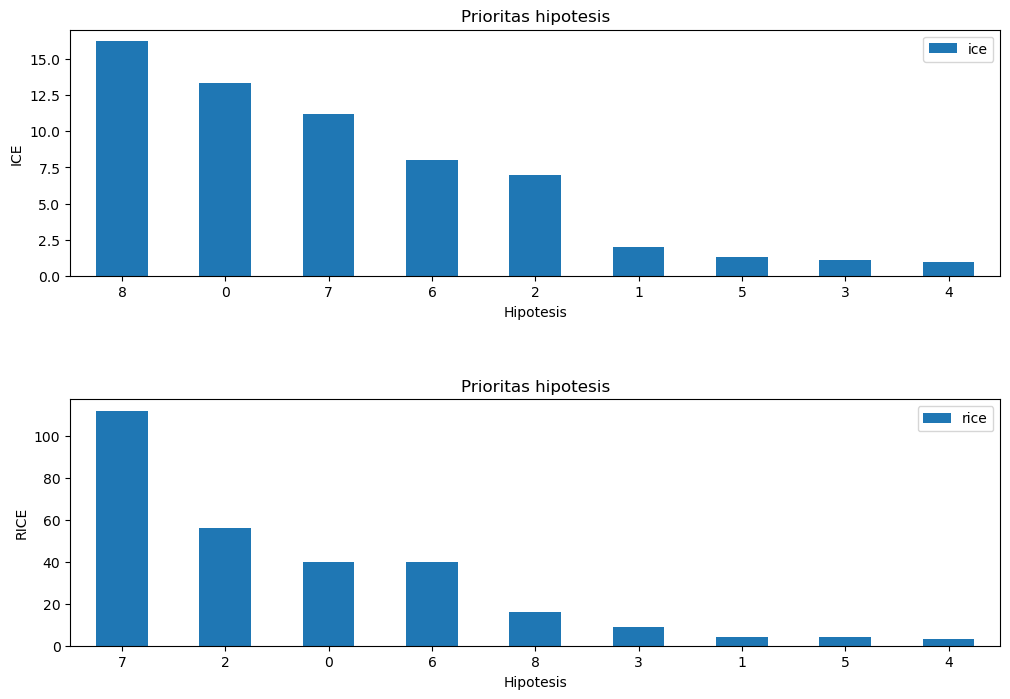

In [27]:
# Ukuran grafik 2 baris 1 kolom
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Grafik dari dataset rice, baris 2 kolom 1
rice_plot = rice.plot(
    kind='bar',
    ax=axes[1]
)

# Memutar label x
rice_plot.set_xticklabels(rice_plot.get_xticklabels(), rotation=0) 

# Grafik dari dataset ice, baris 1 kolom 1
ice_plot = ice.plot(
    kind='bar',
    ax=axes[0]
)

# Memutar label x
ice_plot.set_xticklabels(ice_plot.get_xticklabels(), rotation=0)

# Penamaan subplot
axes[1].set_xlabel('Hipotesis')
axes[1].set_ylabel('RICE')
axes[0].set_xlabel('Hipotesis')
axes[0].set_ylabel('ICE')

# Judul grafik
axes[1].set_title('Prioritas hipotesis')
axes[0].set_title('Prioritas hipotesis')

# Menambahkan ruang antara subplot
plt.subplots_adjust(hspace=0.5)

# Menampilkan grafik
plt.show()

In [28]:
# Hipotesis pada index 0 dan 7
print('Hipotesis dengan index nomor 0: ', df_hyp['hypothesis'][0])
print('Hipotesis dengan index nomor 7: ', df_hyp['hypothesis'][7])

Hipotesis dengan index nomor 0:  Add two new channels for attracting traffic. This will bring 30% more users
Hipotesis dengan index nomor 7:  Add a subscription form to all the main pages. This will help you compile a mailing list


**Kesimpulan sementara**

Metode ICE:
1. Index nomor 8, 0, dan 7 memuncaki prioritas,

Metode RICE:
1. index nomor 7, 2, dan 0 memuncaki prioritas hipotesis yang perlu diuji terlebih dahulu.

Berdasarkan hal tersebut:
1. Hipotesis 0: "Add two new channels for attracting traffic. This will bring 30% more users"
2. Hipotesis 7: "Add a subscription form to all the main pages. This will help you compile a mailing list"
3. Hipotesis 0 dan 7 mememiliki posisi relatif yang menjanjikan untuk diuji terlebih dahulu


[Kembali ke tahapan](#back)

### Analisis A/B testing <a id="2"></a>

df_orders dan df_visits merupakan hasil dari A/B testing yang selanjutnya akan dilakukan proses analisa A/B testing dari dataset tersebut.

#### Mempersiapkan dataset <a id="2.1"></a>

In [29]:
# Kelompok dan tanggal berpasangan yang unik
datesGroups = df_orders[['date', 'group']].drop_duplicates()

In [30]:
# Menerapkan fungsi lambda pada df_orders
df_orders_agg = datesGroups.apply( 
    # Untuk setiap x di datesGroups dengan kondisi
    # df_orders, np.logical_and(array1, array2)
    # baris, axis=1
    lambda x: df_orders[np.logical_and(
        df_orders['date'] <= x['date'],
        df_orders['group'] == x['group'])].agg({
            'date' : 'max',
            'group' : 'max',
            'transactionid' : pd.Series.nunique,
            'visitorid' : pd.Series.nunique,
            'revenue' : 'sum'
}), axis=1).sort_values(by=['date','group'])

In [31]:
# Menerapkan fungsi lambda pada df_visits
df_visits_agg = datesGroups.apply( 
    # Untuk setiap x di datesGroups dengan kondisi
    # df_visits, np.logical_and(array1, array2)
    # baris, axis=1
    lambda x: df_visits[np.logical_and(
        df_visits['date'] <= x['date'],
        df_visits['group'] == x['group'])].agg({
            'date' : 'max',
            'group' : 'max',
            'visits' : 'sum'
}), axis=1).sort_values(by=['date','group'])

In [32]:
# Menggabungkan dataset
report = df_orders_agg.merge(
    df_visits_agg,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)

In [33]:
# Merubah nama kolom
report.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [34]:
# Sampel data
report.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


[Kembali ke tahapan](#back)

#### Proses analisa stabilitas metrik kumulatif <a id="2.2"></a>

Menguji grafik dapat mencegah terjadinya masalah yang mengintai (*peeking problem*).

Peeking problem adalah tindakan menarik kesimpulan sebelum eksperimen selesai, dan membuat keputusan berdasarkan kesimpulan tersebut. Hal ini bisa menyebabkan bias, mengingat adanya potensi pengamatan yang outlier.

Grafik metrik kumulatif akan membantu memutuskan apakah perlu melanjutkan pengujian.

##### Pendapatan kumulatif berdasarkan kelompok

In [35]:
# Kelompok A
report_cumrev_A = report[report['group']=='A'][['date', 'revenue', 'orders']]

# Kelompok B
report_cumrev_B = report[report['group']=='B'][['date', 'revenue', 'orders']]

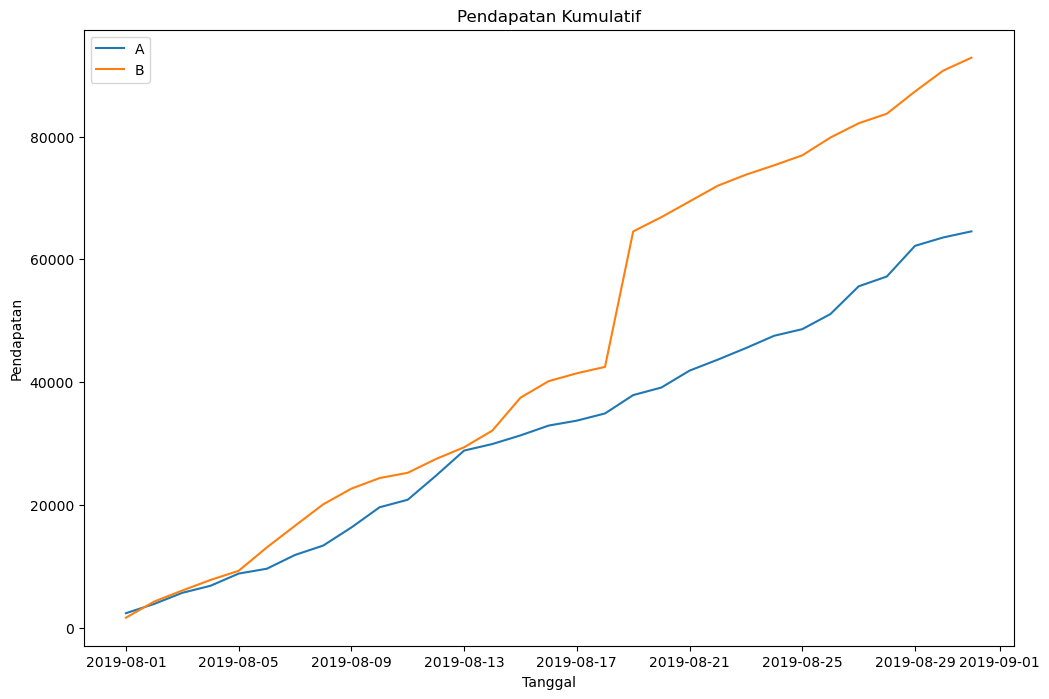

In [36]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik pendapatan berdasarkan hari dan kelompok
plt.plot(report_cumrev_A['date'], report_cumrev_A['revenue'], label='A')
plt.plot(report_cumrev_B['date'], report_cumrev_B['revenue'], label='B')

# Judul
plt.title("Pendapatan Kumulatif")

# Penamaan pada x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Pendapatan')

# Menampilkan grafik dan legend
plt.legend()

# Menampilkan hasilnya
plt.show()

Pendapatan terus meningkat selama pengujian, namun demikian kedua kelompok mencatatkan lonjakan pendapatan pada titik-titik tertentu seperti yang terjadi pada grup B.

Mungkin ini dikarenakan adanya lonjakan pesanan atau pesanan yang sangat mahal dalam sampel.

##### Ukuran pesanan rata-rata kumulatif berdasarkan kelompok

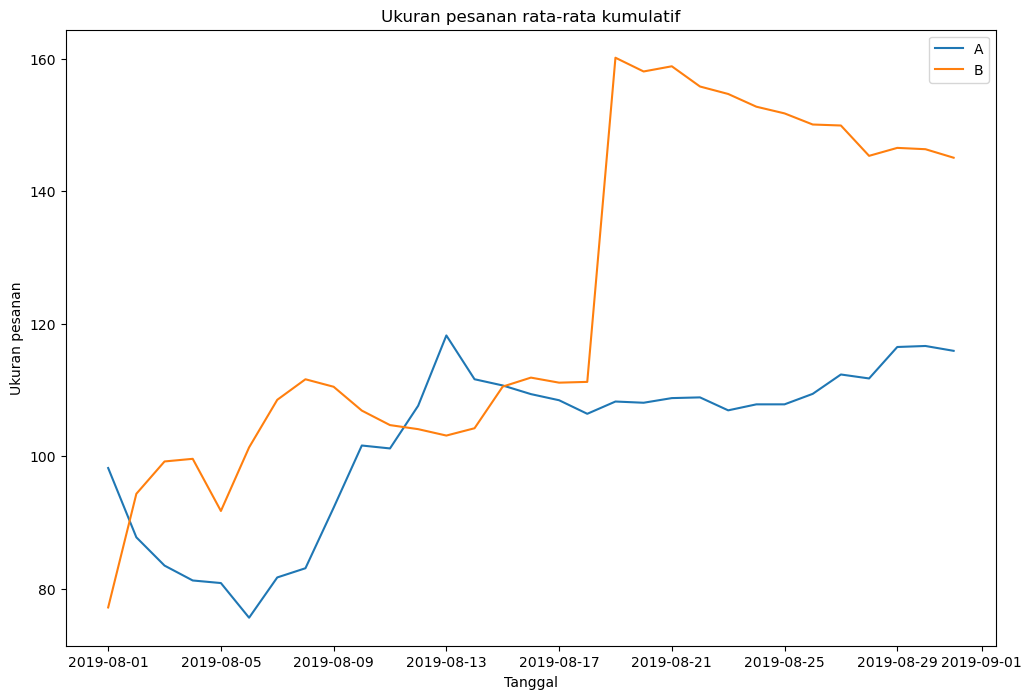

In [37]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik pendapatan berdasarkan hari dan kelompok
plt.plot(report_cumrev_A['date'], report_cumrev_A['revenue']/report_cumrev_A['orders'], label='A')
plt.plot(report_cumrev_B['date'], report_cumrev_B['revenue']/report_cumrev_B['orders'], label='B')

# Judul
plt.title("Ukuran pesanan rata-rata kumulatif")

# Penamaan pada x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Ukuran pesanan')

# Menampilkan grafik dan legend
plt.legend()

# Menampilkan hasilnya
plt.show()

Di awal nilai kumulatif masih berfluktuasi, kemudian baru stabil menjelang akhir pengujian.

Terjadi lonjakan yang cukup besar sekitar tanggal 17-21 Agustus pada grup B. Dan sekitar tanggal 5-17 Agustus untuk grup A.

Mungkin ini juga dikarenakan adanya lonjakan pesanan atau pesanan yang sangat mahal dalam sampel.

##### Perbedaan relatif ukuran pesanan rata-rata kumulatif kelompok B dibandingkan kelompok A

In [38]:
# Menggabungkan dataset akumulatif
report_cumrev_merge = report_cumrev_A.merge(
    report_cumrev_B,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

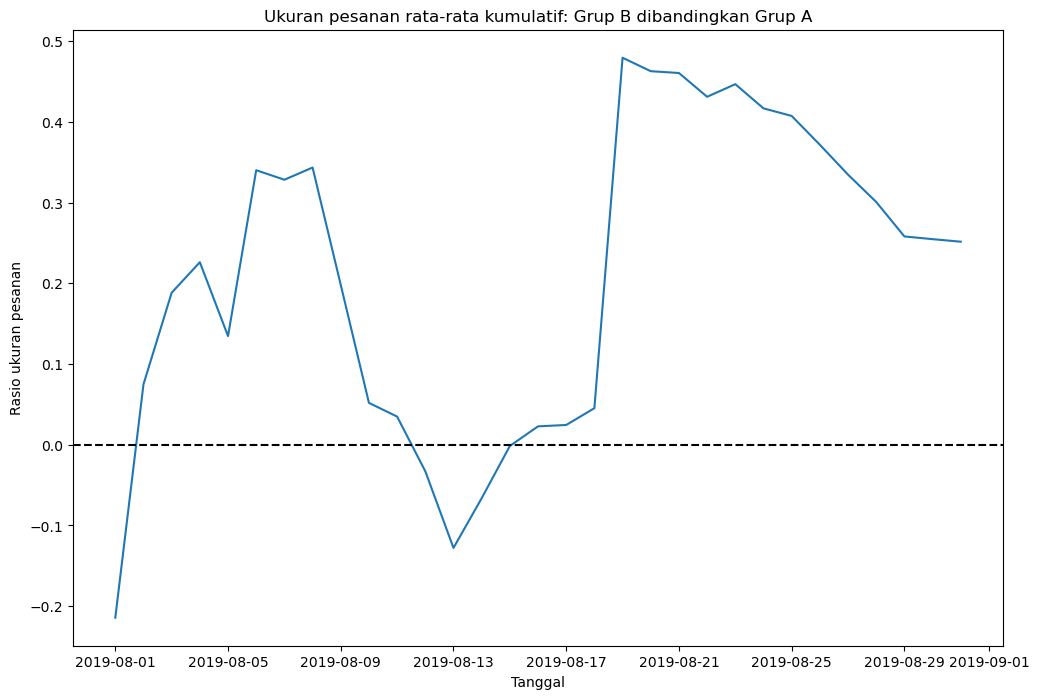

In [39]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik perbedaan relatif untuk jumlah pesanan rata-rata
plt.plot(
    report_cumrev_merge['date'],
    (
        (report_cumrev_merge['revenueB']/report_cumrev_merge['ordersB']) 
        / (report_cumrev_merge['revenueA']/report_cumrev_merge['ordersA'])
    ) - 1
)

# Judul
plt.title("Ukuran pesanan rata-rata kumulatif: Grup B dibandingkan Grup A")

# Penamaan pada x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Rasio ukuran pesanan')

# Sumbu horizontal
plt.axhline(y=0, color='black', linestyle='--')

# Menampilkan grafik
plt.show()

Dibeberapa titik perbedaan meningkat secara dramatis, ini menunjukkan pesanan berukuran besar (*outlier*)

##### Tingkat konversi rasio pesanan terhadap jumlah kunjungan setiap hari setiap kelompok

In [40]:
# Menghitung rasio kumulatif
report['conversion'] = report['orders']/report['visitors']

In [41]:
# Kelompok A
report_cumulative_A = report[report['group']=='A']

# Kelompok B
report_cumulative_B = report[report['group']=='B']

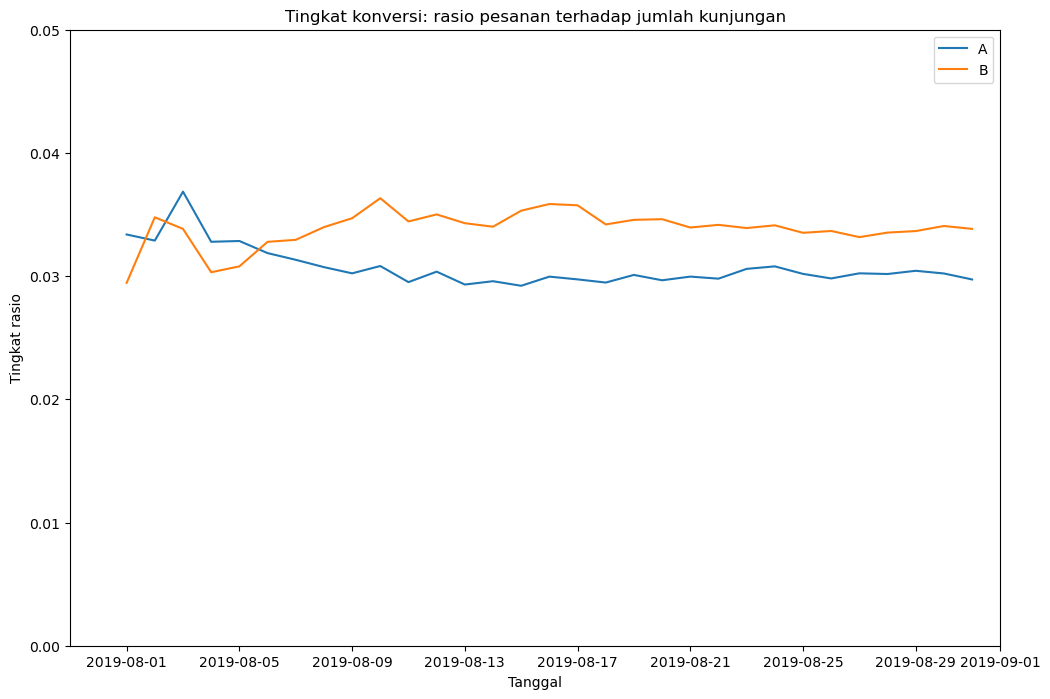

In [42]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik pendapatan berdasarkan hari dan kelompok
plt.plot(report_cumulative_A['date'], report_cumulative_A['conversion'], label='A')
plt.plot(report_cumulative_B['date'], report_cumulative_B['conversion'], label='B')

# Judul
plt.title("Tingkat konversi: rasio pesanan terhadap jumlah kunjungan")

# Penamaan pada x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Tingkat rasio')

# mengatur skala sumbu
plt.axis([pd.to_datetime('2019-07-30'), pd.to_datetime('2019-09-01'), 0, 0.05])

# Menampilkan grafik dan legend
plt.legend()
plt.show()

Hasil yang simetris seperti ini jarang dijumpai dalam data experimental, penyebabnya bisa dari bug kode atau menandakan data yang tidak dapat dipercaya. 

Namun disini diasumsikan jika dataset valid dan bisa dipercaya.

Jadi berikut observasinya, pada awal pengujian grup A memiliki tingkat konversi lebih tinggi dari grup B, namun grup B meningkat secara berkalan dan akhirnya lebih tinggi dari grup A, kedua kelompok berfluktuasi di sekitar nilai yang sama sebelum menjadi stabil.

In [43]:
# Menggabungkan dataset akumulatif
report_cumconver_merge = report_cumulative_A[['date', 'conversion']].merge(
    report_cumulative_B[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

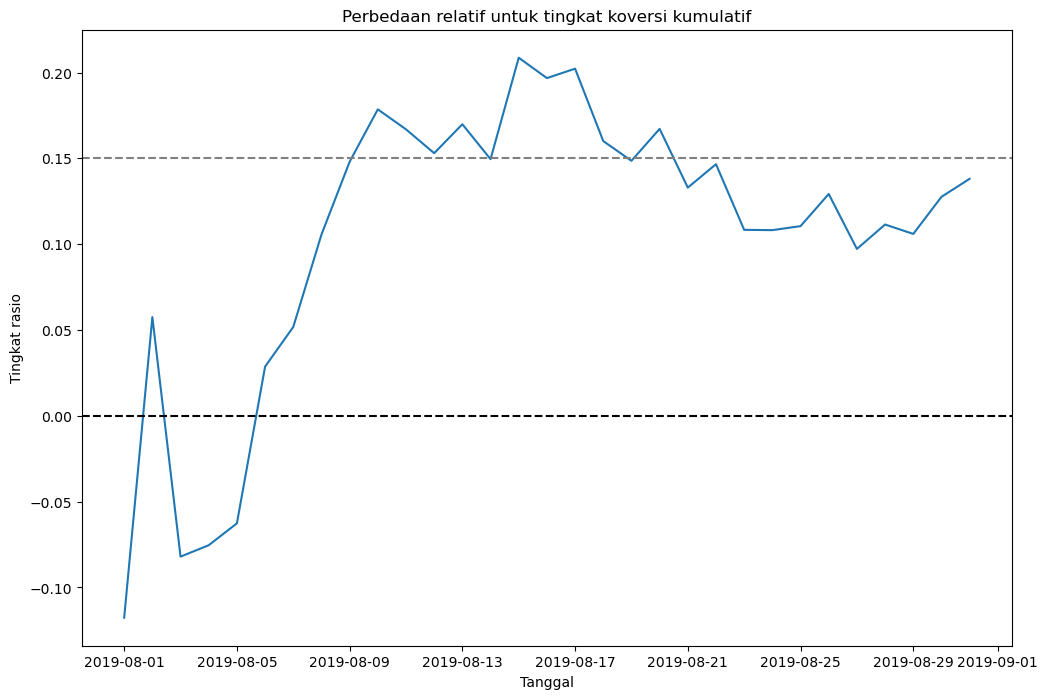

In [44]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik perbedaan relatif untuk tingkat koversi kumulatif
plt.plot(
    report_cumconver_merge['date'],
    (
        report_cumconver_merge['conversionB']
        /report_cumconver_merge['conversionA']
    ) -1
)

# Judul
plt.title("Perbedaan relatif untuk tingkat koversi kumulatif")

# Penamaan pada x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Tingkat rasio')

# mengatur skala sumbu
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# Menampilkan grafik
plt.show()

Grup B terus meningkat dan mencapai titik stabil disekitar 15% lebih tinggi dari grup A.

[Kembali ke tahapan](#back)

#### Menganalisa dan memperbaiki outlier <a id="2.3"></a>

##### Jumlah pesanan per pengguna

In [45]:
# Memisahkan kolom yang dibutuhkan,
# mengelompokkan berdasarkan kolom `visitorid`,
# dan menghitung jumlah pesanan
orders_users = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({
        'transactionid' : pd.Series.nunique
    })
)

In [46]:
# Merubah nama kolom
orders_users.columns = ['visitorid', 'orders']

In [47]:
# Mengurutkan data 
orders_users.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


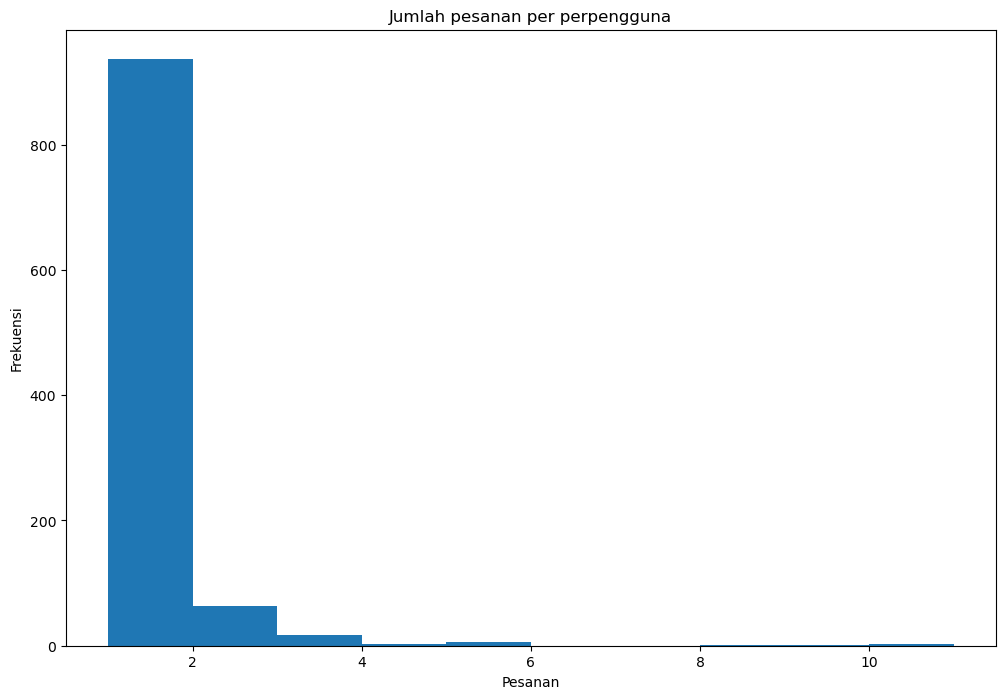

In [48]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik
plt.hist(orders_users['orders'])

# Judul
plt.title("Jumlah pesanan per perpengguna")

# Penamaan pada x,y-axis
plt.xlabel('Pesanan')
plt.ylabel('Frekuensi')

# Menampilkan grafik
plt.show()

Mayoritas melakukan satu pesanan. Namun sebagian besar persentase pelanggan melakukan dua hingga 4 pesanan.

In [49]:
# Membuat data sumbu x berdasarkan nilai pada dataset orders_users
x_values = pd.Series(range(0, len(orders_users)))

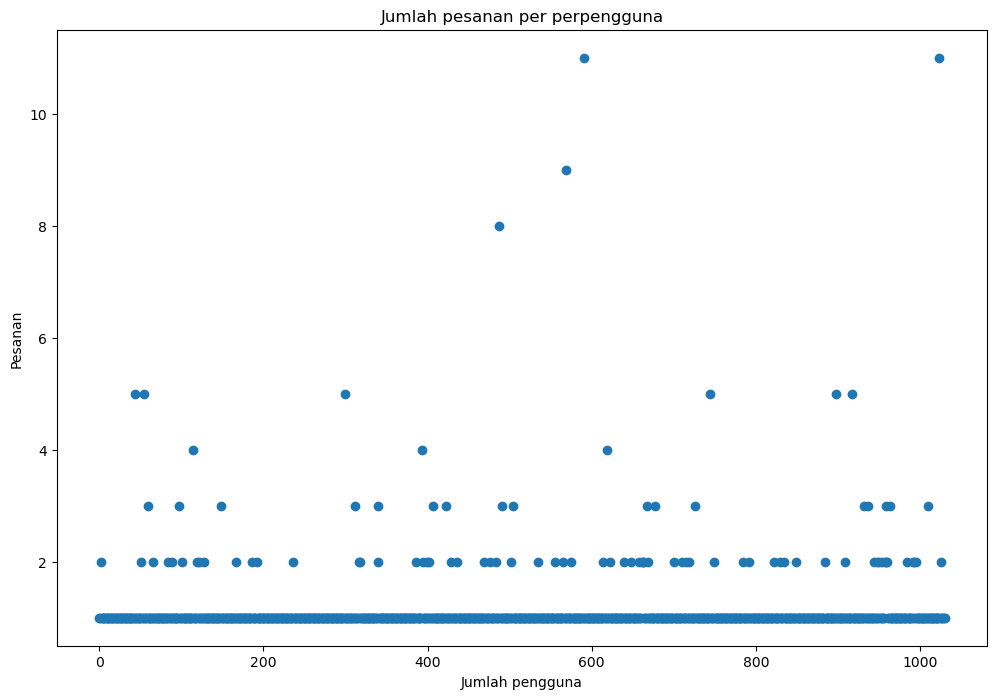

In [50]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik
plt.scatter(x_values, orders_users['orders'])

# Judul
plt.title("Jumlah pesanan per perpengguna")

# Penamaan pada x,y-axis
plt.xlabel('Jumlah pengguna')
plt.ylabel('Pesanan')

# Menampilkan grafik
plt.show()

Dengan grafik ini dapat dikonfirmasi bahwa memang terdapat banyak pengguna yang melakukan pesanan dua hingga empat pesanan.

##### Persentil ke-95 dan ke-99  jumlah pesanan per pengguna

In [51]:
# 95, dand 99 percentil jumlah pesanan per pengguna
np.percentile(orders_users['orders'], [95, 99])

array([2., 4.])

Seperti yang terlihat jumlah pesanan yang membuat lebih dari dua pesanan tidak melampaui 5% dan yang membuat empat pesanan tidak lebih dari 10%.

Sehingga dapat ditetapkan pengguna yang melakukan lebih dari 2 pesanan akan dianggap anomali (*outlier*).

##### Total harga pesanan

In [52]:
# Mengurutkan dataset
df_orders.sort_values(by='revenue', ascending=False).head(10)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A


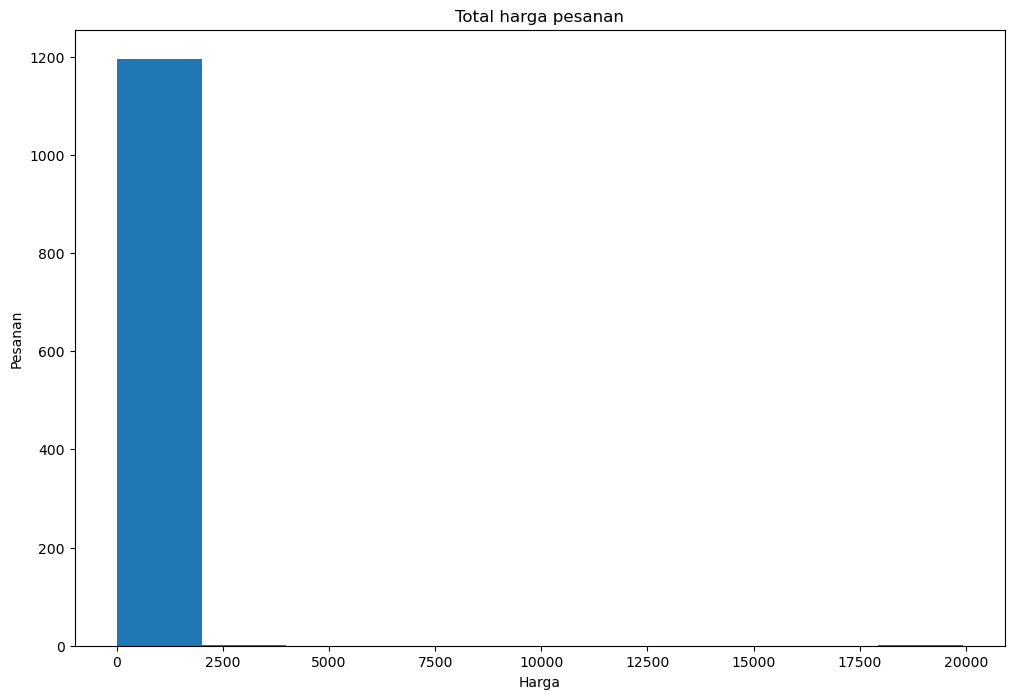

In [53]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik
plt.hist(df_orders['revenue'])

# Judul
plt.title("Total harga pesanan")

# Penamaan pada x,y-axis
plt.xlabel('Harga')
plt.ylabel('Pesanan')

# Menampilkan grafik
plt.show()

Grafik tersebut menunjukkan ada pesanan dengan total harga diatas 2500 dolar, meski demikian sebagian besar pesanan berukuran lebih kecil.

In [54]:
# Membuat data sumbu x berdasarkan nilai pada dataset df_orders['revenue']
x_values_orders = pd.Series(range(0, len(df_orders['revenue'])))

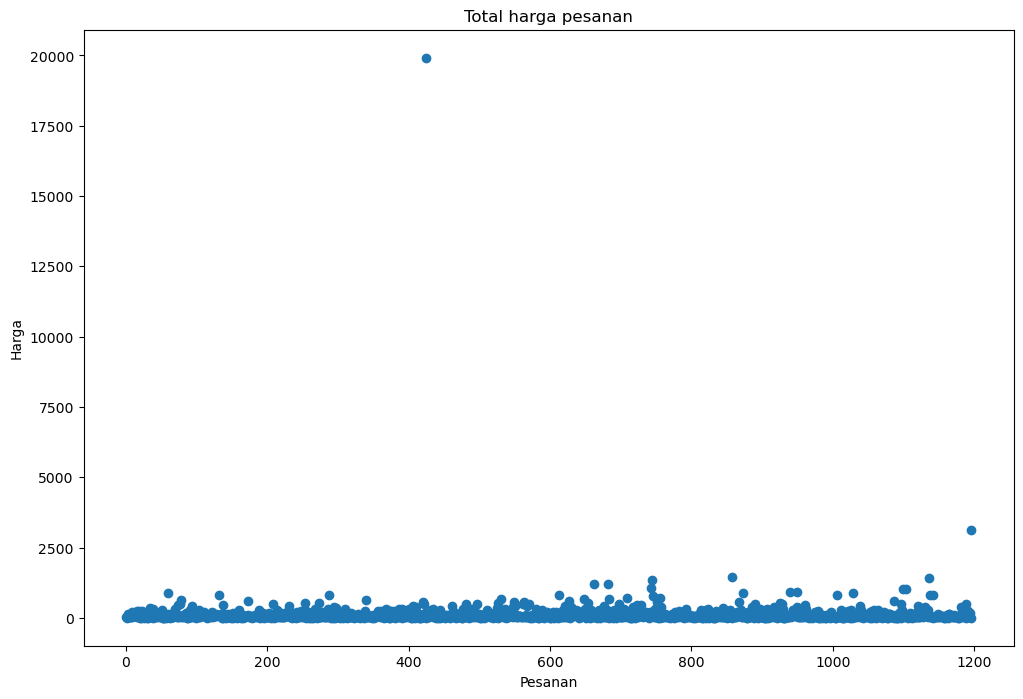

In [55]:
# Ukuran grafik
plt.figure(figsize=(12, 8))

# Grafik
plt.scatter(x_values_orders, df_orders['revenue'])

# Judul
plt.title("Total harga pesanan")

# Penamaan pada x,y-axis
plt.xlabel('Pesanan')
plt.ylabel('Harga')

# Menampilkan grafik
plt.show()

Seperti yang terlihat terdapat pesanan dengan total harga yang besar.

##### Persentil ke-95 dan ke-99 untuk total harga pesanan

In [56]:
# 95, dand 99 percentil jumlah pesanan per pengguna
np.percentile(df_orders['revenue'], [95, 99])

array([435.54 , 900.904])

Seperti yang terlihat jumlah total harga pesanan yang dibuat lebih dari 435.54 dolar tidak melampaui 5% dan yang membuat 900.9 dolar pesanan tidak lebih dari 10%.

Sehingga dapat ditetapkan pengguna yang melakukan pesanan dengan total harga sekitar 435.54 - 900.9 dolar akan dianggap anomali (*outlier*), mari tetapkan lebih dari 500 dolar untuk anomali ini.

[Kembali ke tahapan](#back)

## Menguji Hipotesis <a id="Test"></a>

Uji hipotesis kali ini akan menggunakan pengujian Mann-Whitney U untuk menentukan peringkat dua sampel dalam urutan naik dan membandingkan peringkat nilai yang muncul di kedua sampel.

Semakin tinggi jumlah pergeseran peringkat, semakin tinggi probabilitas perbedaan distribusi dari kedua sampel tersebut. Hal ini memungkinkan untuk menyimpulkan ada atau tidak adanya perbedaan untuk tingkat signifikansi apa pun yang ditetapkan.

Metode nonparametrik sangatlah membantu, mengingat metode tersebut tidak membuat dugaan tentang bagaimana data didistribusikan. Metode seperti ini sering digunakan ketika parameter sulit (atau bahkan tidak mungkin) untuk diperkirakan akibat terlalu banyaknya outlier.

Metode ini memiliki nilai p-value atau probabilitas kemunculan nilai dan juga alpha atau batas error yang digunakan, jika p-value lebih kecil dari alpha maka H1 semakin terbukti, dan sebaliknya jika p-value lebih besar dari alpha maka H0 semakin terbukti.

### Signifikansi statistik perbedaan konversi antar kelompok (data mentah) <a id="h1"></a>

In [57]:
# Jumlah transaksi berdasarkan grup dan per pengguna, Grup A
orders_A = df_orders[df_orders['group']=='A'].groupby('visitorid',as_index=False).agg({
    'transactionid' : pd.Series.nunique
})

# Jumlah transaksi berdasarkan grup dan per pengguna, Grup B
orders_B = df_orders[df_orders['group']=='B'].groupby('visitorid',as_index=False).agg({
    'transactionid' : pd.Series.nunique
})

In [58]:
# Merubah nama kolom
orders_A.columns = ['visitorid', 'orders']
orders_B.columns = ['visitorid', 'orders']

In [59]:
# Jumlah pesanan yang dibuat oleh pengguna dari grup A, termasuk nol
sampleA = pd.concat([orders_A['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_A['orders'])
), name='orders')],axis=0)

# Jumlah pesanan yang dibuat oleh pengguna dari grup B, termasuk nol
sampleB = pd.concat([orders_B['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_B['orders'])
), name='orders')],axis=0)

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0: Tidak terdapat perbedaan konversi antar kelompok.
2. H1: Terdapat perbedaan konversi antar kelompok.

Jika H0 mendefinisikan 'Tidak terdapat perbedaan' konversi antar kelompok, maka H1 akan mendefinisikan kebalikan dari H0 yaitu 'Terdapat perbedaan' konversi antar kelompok.

Untuk saat ini alpha yang digunakan adalah 5% untuk semua uji hipotesis yang dilakukan, kenapa tidak 1%, atau 10%?, karena 5% adalah angka yang seimbang untuk menghindari type-I error, atau type-II error.

Type-I error mendukung hipotesis alternatif (H1) saat hipotesis nol (H0) benar, sedangakan type-II error tidak mendukung hipotesis nol (H0) disaat hipotesis alternatif (H1) benar.

In [60]:
# Alpha ditentukan 0.05
alpha = 0.05

# Mann-Whitney U test
results = st.mannwhitneyu(sampleA, sampleB)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.016792355056752608
Kita menolak hipotesis nol


In [61]:
# Perbedaan relatif konversi antar kelompok
round(sampleB.mean()/sampleA.mean()-1, 3)

0.138

Seperti yang dijelaskan diatas, karena nilai p-value lebih kecil dari alpha maka hipotesis nol ditolak, yang berarti terdapat perbedaan konversi antar kelompok.

Dan perbedaan relatif konversi antar kelompokknya sebesar 13.8%.

[Kembali ke tahapan](#back)

### Signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok (data mentah) <a id="h2"></a>

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0: Tidak terdapat perbedaan ukuran pesanan rata-rata antar kelompok.
2. H1: Terdapat perbedaan ukuran pesanan rata-rata antar kelompok.

Jika H0 mendefinisikan 'Tidak terdapat perbedaan' ukuran pesanan rata-rata antar kelompok, maka H1 akan mendefinisikan kebalikan dari H0 yaitu 'Terdapat perbedaan' ukuran pesanan rata-rata antar kelompok.

In [62]:
 # Alpha ditentukan 0.05
alpha = 0.05

# Mann-Whitney U test
results = (st.mannwhitneyu(
    df_orders[df_orders['group']=='A']['revenue'],
    df_orders[df_orders['group']=='B']['revenue'])
)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.6915246773264736
Kita tidak bisa mengabaikan hipotesis nol


In [63]:
# Perbedaan ukuran pesanan rata-rata antar kelompok
round(
    (df_orders[df_orders['group']=='B']['revenue'].mean()/
     df_orders[df_orders['group']=='A']['revenue'].mean()) -1 
, 3)

0.252

Seperti yang terlihat karena nilai p-value lebih besar dari alpha maka hipotesis nol tidak bisa diabaikan, yang berarti tidak terdapat perbedaan ukuran pesanan rata-rata antar kelompok.

Dan perbedaan ukuran pesanan rata-rata antar kelompokknya sebesar 25.2%.

[Kembali ke tahapan](#back)

### Signifikansi statistik perbedaan konversi antar kelompok (data yang difilter) <a id="h3"></a>

In [64]:
# Pengguna yang melakukan lebih dari 2 pesanan
users_orders_count = pd.concat([
    orders_A[orders_A['orders'] > 2]['visitorid'],
    orders_B[orders_B['orders'] > 2]['visitorid']],
    axis = 0
)

In [65]:
# Pengguna yang menghabiskan biaya lebih dari 500000
users_orders_expense = df_orders[df_orders['revenue'] > 50000]['visitorid']

In [66]:
# Menggabungkan kolom series
abnormal_users = (
    pd.concat([users_orders_count, users_orders_expense],axis = 0)
    .drop_duplicates()
    .sort_values()
)

# Menampilkan hasilnya
abnormal_users.head()

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorid, dtype: int64

In [67]:
# Ukuran dataset
abnormal_users.shape

(20,)

In [68]:
# Filter sampel A
sampleA_filt = pd.concat([orders_A[np.logical_not(orders_A['visitorid'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_A['orders'])
),name='orders')],axis=0)


# Filter sampel B
sampleB_filt = pd.concat([orders_B[np.logical_not(orders_B['visitorid'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_B['orders'])
),name='orders')],axis=0)

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0: Tidak terdapat perbedaan konversi antar kelompok.
2. H1: Terdapat perbedaan konversi antar kelompok.

Jika H0 mendefinisikan 'Tidak terdapat perbedaan' konversi antar kelompok, maka H1 akan mendefinisikan kebalikan dari H0 yaitu 'Terdapat perbedaan' konversi antar kelompok.

In [69]:
# Alpha ditentukan 0.05
alpha = 0.05

# Mann-Whitney U test
results = st.mannwhitneyu(sampleA_filt, sampleB_filt)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol')  

p-value: 0.011549354609175194
Kita menolak hipotesis nol


In [70]:
# Perbedaan relatif konversi antar kelompok setelah difilter
round(sampleB_filt.mean()/sampleA_filt.mean()-1, 3)

0.17

Seperti yang terlihat karena nilai p-value lebih kecil dari alpha maka hipotesis nol ditolak, yang berarti terdapat perbedaan konversi antar kelompok.

Dan perbedaan relatif konversi antar kelompokknya sebesar 17%.

[Kembali ke tahapan](#back)

### Signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok (data yang difilter) <a id="h4"></a>

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0: Tidak terdapat perbedaan ukuran pesanan rata-rata antar kelompok.
2. H1: Terdapat perbedaan ukuran pesanan rata-rata antar kelompok.

Jika H0 mendefinisikan 'Tidak terdapat perbedaan' ukuran pesanan rata-rata antar kelompok, maka H1 akan mendefinisikan kebalikan dari H0 yaitu 'Terdapat perbedaan' ukuran pesanan rata-rata antar kelompok.

In [71]:
# Alpha ditentukan 0.05
alpha = 0.05

# Mann-Whitney U test
results = st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'])

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.7057054773124258
Kita tidak bisa mengabaikan hipotesis nol


In [72]:
# Perbedaan ukuran pesanan rata-rata antar kelompok setelah difilter
round(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'].mean() - 1, 3)

0.228

Seperti yang terlihat karena nilai p-value lebih besar dari alpha maka hipotesis nol tidak bisa diabaikan, yang berarti tidak terdapat perbedaan ukuran pesanan rata-rata antar kelompok.

Dan perbedaan ukuran pesanan rata-rata antar kelompoknya sebesar 22.8%.

**Kesimpulan sementara**

Berikut fakta yang didapatkan dari hasil uji hipotesis:
1. Baik data mentah maupun data yang telah difilter, keduanya menunjukkan perbedaan yang signifikan secara statistik dalam hal konversi antar kelompok
2. Baik data mentah maupun data yang telah difilter, keduanya tidak menunjukkan perbedaan yang signifikan secara statistik dalam hal ukuran pesanan rata-rata antar kelompok
3. Grafik yang menunjukkan perbedaan konversi antar kelompok menunjukkan bahwa hasil kelompok B lebih baik, dan tidak memperlihatkan peningkatan secara signifikan
4. Grafik yang menunjukkan perbedaan ukuran pesanan rata-rata antar kelompok menunjukkan bahwa hasil kelompok B semakin baik dari hari ke hari.

**Keputusan berdasarkan hasil pengujian**

Berdasarkan hasil uji statistik berikut keputusan yang memungkinkan untuk diambil: 

Menghentikan pengujian, serta mempertimbangkan salah satu grup sebagai pemimpin seperti yang ditunjukkan probabilitas grup B lebih baik dari grup A dalam hal ukuran pesanan rata-rata.

[Kembali ke tahapan](#back)

## Kesimpulan Umum <a id="Kesimpulan"></a>

Setelah dilakukan pemeriksaan dataset, melakukan perbaikan dan melakukan analisa, berikut hasilnya:

Pada bagian prioritas hipotesis:
- Hipotesis 0 dan 7 mememiliki posisi relatif yang menjanjikan untuk diuji terlebih dahulu

Kemudian pada pengujian hipotesis:
- Keputusan akhirnya yakni untuk menghentikan pengujian, dan mempertimbangkan grup B menjadi pemimpin berdasarakan probabilitas yang ditunjukkan.

[Kembali ke tahapan](#back)